In [1]:
%matplotlib ipympl
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, BatchNormalization, MaxPool2D
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

tf.config.list_physical_devices('GPU')

2024-02-16 08:50:56.464855: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-16 08:50:56.496505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 08:50:56.496543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 08:50:56.497312: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 08:50:56.502210: I tensorflow/core/platform/cpu_feature_guar

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


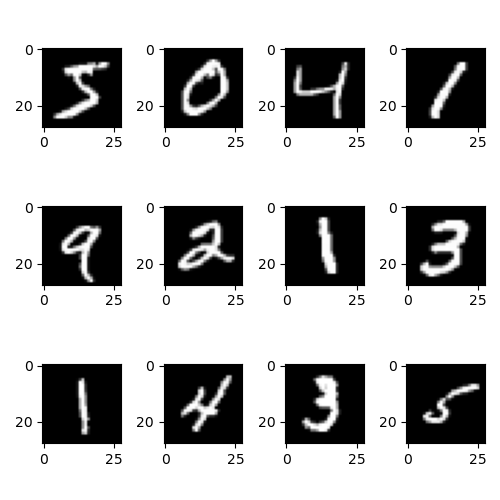

In [3]:
plt.figure(figsize=(5, 5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(x_train[k], cmap='gray')
plt.tight_layout()
plt.show()

In [4]:
# x_train = x_train.reshape(60000, 28*28).astype(np.float32)//255
# x_test = x_test.reshape(10000, 28*28).astype(np.float32)//255

x_train = x_train.reshape(-1,28,28,1).astype(np.float32)/255.0
x_test = x_test.reshape(-1,28,28,1).astype(np.float32)/255.0

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
model = Sequential()
model.add(Conv2D(filters=56, kernel_size=(3, 3), padding='same', activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# optimizer = optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# model.compile(loss='mean_squared_error', optimizer=optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=optimizers.AdamW(learning_rate=0.001), metrics=['accuracy'])

2024-02-16 08:51:10.694378: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-16 08:51:10.695249: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-16 08:51:10.695419: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [7]:
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation = "softmax"))

In [8]:
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.00001)


In [9]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

# datagen.fit(x_train)

In [10]:
model.fit(x_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(x_test, y_test))
# history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
#                               epochs = 10, validation_data = (x_test,y_test),
#                               verbose = 2, steps_per_epoch=x_train.shape[0] // 128
#                               , callbacks=[learning_rate_reduction])

Epoch 1/20


2024-02-16 08:51:12.192748: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-02-16 08:51:12.303031: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-16 08:51:13.078545: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9d8cbefd10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 08:51:13.078592: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-16 08:51:13.084665: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708044673.150997  132231 device_compiler.h:186] Compiled clust

469/469 [==============================] - 7s 8ms/step - loss: 0.4662 - accuracy: 0.8427 - val_loss: 0.0778 - val_accuracy: 0.9740
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1315 - accuracy: 0.9594 - val_loss: 0.0475 - val_accuracy: 0.9844
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1022 - accuracy: 0.9680 - val_loss: 0.0350 - val_accuracy: 0.9883
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0835 - accuracy: 0.9735 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0759 - accuracy: 0.9764 - val_loss: 0.0253 - val_accuracy: 0.9910
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0681 - accuracy: 0.9788 - val_loss: 0.0251 - val_accuracy: 0.9919
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0642 - accuracy: 0.9799 - val_loss: 0.0226 - val_accuracy: 0.9918
Epoch 8/20
469/46